# <p style='text-align: center; '>TITANIC SURVIVAL PREDICTION</p>

* The objective of this project is to build a model that predicts whether a passenger on the Titanic survived or not.

* The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket, class, fare, cabin, and whether or not they survived.

## Importing libraries
We first imports all essential Python packages which are used for titanic survival prediction.

In [304]:
#Importing All Required Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## Loading the data
The dataset we are going to use is from a CSV file named "train.csv" and "test.csv". The dataset contains the information about individual passengers, such as their age, gender, ticket, class, fare, cabin, and whether or not they survived.

In [241]:
#Loading Datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Exploring data
The initial data exploration is used to take a look at the dataset for its better understanding.

In [242]:
# display first few rows of 'train' dataset.
train.head()

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,...,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,...,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,...,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,...,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,...,0,373450,8.0500,NaN,S


In [243]:
# Display shape of 'train' dataset
train.shape

(891, 12)

In [244]:
# Display shape of 'test' dataset
test.shape

(418, 12)

In [245]:
# Checking for Null values in 'train' dataset.
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [246]:
# Checking for Null values in 'test' dataset.
test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [247]:
# Description of 'train' dataset.
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,...,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,...,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,...,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,...,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,...,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,...,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,...,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,...,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,...,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,...,0.000000,NaN,31.000000,NaN,NaN


In [248]:
# Description of 'test' dataset.
test.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418.000000,418,418,...,418.000000,418,417.000000,91,418
unique,NaN,NaN,NaN,418,2,...,NaN,363,NaN,76,3
top,NaN,NaN,NaN,"Kelly, Mr. James",male,...,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,NaN,1,266,...,NaN,5,NaN,3,270
mean,1100.500000,0.363636,2.265550,NaN,NaN,...,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.481622,0.841838,NaN,NaN,...,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,0.000000,1.000000,NaN,NaN,...,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,0.000000,1.000000,NaN,NaN,...,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,0.000000,3.000000,NaN,NaN,...,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,1.000000,3.000000,NaN,NaN,...,0.000000,NaN,31.500000,NaN,NaN


In [249]:
# calculating the survival rate for each gender in the 'train' dataset.
train.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [250]:
# printing the total number of males and females in the 'train' dataset. 
male = len(train[train['Sex'] == 'male'])
print("Total no of Males in Titanic:",male)

female = len(train[train['Sex'] == 'female'])
print("Total no of Females in Titanic:",female)

Total no of Males in Titanic: 577
Total no of Females in Titanic: 314


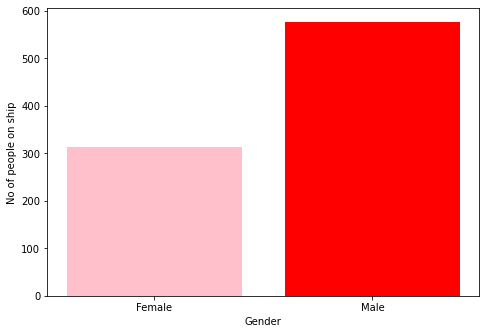

In [251]:
# Plotting
fgre = plt.figure()
ax = fgre.add_axes([0,0,1,1])
gender = ['Female','Male']
index = [314,577]
bar_colors = ['pink', 'red']
ax.bar(gender,index,color=bar_colors)
plt.xlabel("Gender")
plt.ylabel("No of people on ship")
plt.show()

In [252]:
alive = len(train[train['Survived'] == 1])
dead = len(train[train['Survived'] == 0])

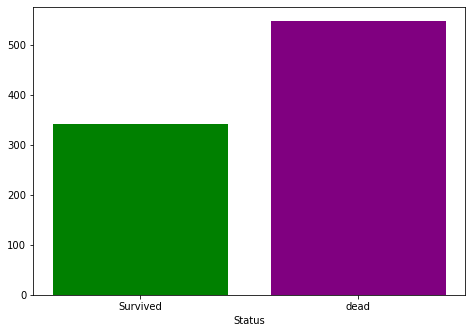

In [253]:
# plotting
fgre = plt.figure()
ax = fgre.add_axes([0,0,1,1])
status = ['Survived','dead']
bar_colors = ['green', 'purple']
ind = [alive,dead]
ax.bar(status,ind,color=bar_colors)
plt.xlabel("Status")
plt.show()

Text(0.5, 1.0, "Bar graph of people accrding to ticket class in which people couldn't survived")

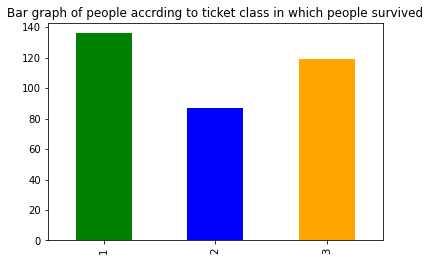

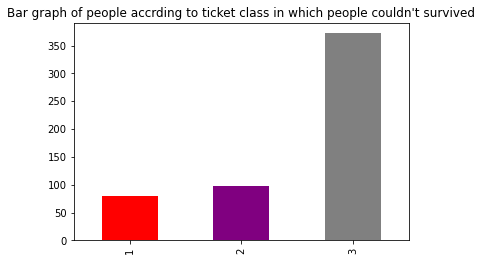

In [254]:
# plotting
plt.figure(1)
survived_colors = ['green', 'blue', 'orange']
train.loc[train['Survived'] == 1, 'Pclass'].value_counts().sort_index().plot.bar(color=survived_colors)
plt.title('Bar graph of people accrding to ticket class in which people survived')


plt.figure(2)
not_survived_colors = ['red', 'purple', 'gray']
train.loc[train['Survived'] == 0, 'Pclass'].value_counts().sort_index().plot.bar(color=not_survived_colors)
plt.title('Bar graph of people accrding to ticket class in which people couldn\'t survived')

<AxesSubplot:ylabel='Survived'>

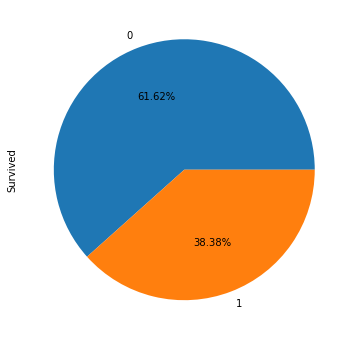

In [255]:
# look at the overall survival ratio
fig = plt.figure(figsize=(6,6))
train['Survived'].value_counts().plot.pie(autopct = '%1.2f%%')

## Cleaning data

Time to clean our data to account for missing values and unnecessary information!

In [256]:
# Droping Useless Column 'tickets'
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

In [257]:
# Droping Useless Column 'cabin'
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

In [258]:
# Droping Useless Column 'name'
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

In [259]:
#Feature Selection
column_train=['Age','Pclass','SibSp','Parch','Fare','Sex','Embarked']
#training values
X=train[column_train]
#target value
Y=train['Survived']

In [260]:
X['Age'].isnull().sum()
X['Pclass'].isnull().sum()
X['SibSp'].isnull().sum()
X['Parch'].isnull().sum()
X['Fare'].isnull().sum()
X['Sex'].isnull().sum()
X['Embarked'].isnull().sum()

2

In [261]:
#now we have to fill all the missing values
#age have 177  missing values
#either we fill missing values with mean or median form existing values 
X['Age']=X['Age'].fillna(X['Age'].median())
X['Age'].isnull().sum()

0

In [262]:
X['Embarked'] = train['Embarked'].fillna(method ='pad')
X['Embarked'].isnull().sum()

0

In [263]:
#now we need to convert sex into integer value 
d={'male':0, 'female':1}
X['Sex']=X['Sex'].apply(lambda x:d[x])
X['Sex'].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [264]:
e={'C':0, 'Q':1 ,'S':2}
X['Embarked']=X['Embarked'].apply(lambda x:e[x])
X['Embarked'].head()

0    2
1    0
2    2
3    2
4    2
Name: Embarked, dtype: int64

## Splitting into training/testing sets

In [314]:
#Training Testing and Spliting the model
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

## Classifier models

In [315]:
#Using Decision Tree
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(X_train,Y_train)
y_pred4 = model4.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred4))

Accuracy Score: 0.7574626865671642


In [316]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,pred_y)
print(confusion_mat)
print(classification_report(Y_test,pred_y))

[[134  23]
 [ 94  17]]
              precision    recall  f1-score   support

           0       0.59      0.85      0.70       157
           1       0.42      0.15      0.23       111

    accuracy                           0.56       268
   macro avg       0.51      0.50      0.46       268
weighted avg       0.52      0.56      0.50       268



In [299]:
#Using LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))

Accuracy Score: 0.8134328358208955


In [317]:
#Confusion Matrix
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_mat = confusion_matrix(Y_test,Y_pred)
print(confusion_mat)

[[137  20]
 [ 30  81]]


In [318]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree'],
    'Score': [0.81,0.75]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.81,Logistic Regression
0.75,Decision Tree


The accuracy score of the "Logistic Regression" model is 81%, while the "Decision Tree" model achieves an accuracy score of 75% , So i will train my model with logistic regression.